# Assignment 1

## Name: Chibuzo Ukegbu 

### Collaborators: None


# Notes

Submit your homework by uploading it in the directory with your name. Please mention in this file the names of any students with whom you collaborated. If you didn't collaborate with anyone, mark your collaborators as "None." 
Remember, your goal is to communicate. Full credit will be given only to correct solutions which are described clearly. Convoluted and obtuse descriptions will receive low marks. 
To complete your homework, you may ONLY consult the following material: 
1.	lecture slides
2.	course notes you or others took during lecture.
3.	the required text 
4.	websites that may clarify the concepts covered in the material but do not in any way provide complete solutions to the problems.

Deadline

Please provide an answer to the following questions: 

# Question 1 (10 pts)

Create a script that: 
1. loads the iris dataset.
2. scales the independent features.
3. computes the correlation coefficients and co-variance among all pairs of independent features.
4. computes the PCA and shows the principal components (their coefficients) 
5. computes the correlation coefficient between each original feature and the new features generated by the PCA 


# Question 2 (5 pts + (5 pts Extra))

1. What you can observe by comparing the results in Question 1 sections 4 and 5?
2. Can you define any property indicated by these results?
3. If there is any property are you able to formally prove it? (5 extra pts)

# Question 3 (10 pts)

1) Write code in pure python (Numpy and Scipy are allowed, SciKit is Not) to implement a decision tree. In input, you should provide the independent features and the dependent feature (the class) separately.
You can assume that the dependent features and the independent feature are binary. Please implement the Gini index and the entropy gain ratio. You can read the code available online, but you cannot plagiarize it.

2) Create a toy example to run and test your code (please show the result).



In [1]:
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings("ignore")

## Loading the Dataset.

In [2]:
iris_data = pd.read_csv('iris.csv')
iris_data = pd.DataFrame(iris_data.values, columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
iris_data =iris_data.drop(columns= ['class'])
iris_data.head()



,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_data.describe()

,sepal length,sepal width,petal length,petal width
count,150.0,150.0,150.0,150.0
unique,35.0,23.0,43.0,22.0
top,5.0,3.0,1.5,0.2
freq,10.0,26.0,14.0,28.0


## Scaling the features

In [4]:

sc_data= preprocessing.scale(iris_data)
sc_data=pd.DataFrame(sc_data,columns= ['sepal length','sepal width','petal length','petal width'])
sc_data.head(10)



,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


## Describing the Scaled data numerically and visually:

In [5]:
sc_data.describe()

,sepal length,sepal width,petal length,petal width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


array([[<AxesSubplot:title={'center':'sepal length'}>,
        <AxesSubplot:title={'center':'sepal width'}>],
       [<AxesSubplot:title={'center':'petal length'}>,
        <AxesSubplot:title={'center':'petal width'}>]], dtype=object)

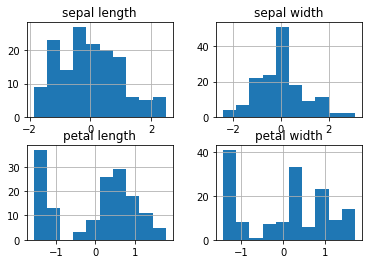

In [6]:
sc_data.hist() # let's see the distribution of the data 

## Compute the correlation matrix 

In [7]:
print ('Correlation Matrix :')
sc_data.corr()

Correlation Matrix :


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


## Computing the Covarience Matrix 

In [8]:
print ('Covariance Matrix =>')
sc_data.cov()

Covariance Matrix =>


,sepal length,sepal width,petal length,petal width
sepal length,1.006711,-0.110103,0.877605,0.823443
sepal width,-0.110103,1.006711,-0.423338,-0.358937
petal length,0.877605,-0.423338,1.006711,0.969219
petal width,0.823443,-0.358937,0.969219,1.006711


## Eigen values of covariance matrix 

In [9]:
bb=sc_data.cov()
eigenvalues = np.linalg.eigvals(bb)
print (eigenvalues)

[2.93035378 0.92740362 0.14834223 0.02074601]


## Computing the PCA and showing the principal components 

In [10]:

get_pca= PCA()
pca1=get_pca.fit_transform(sc_data)

pc_data=pd.DataFrame(pca1,columns= ['pc1','pc2','pc3','pc4'])
#print(data_pca.components_)
pc_data

,pc1,pc2,pc3,pc4
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397
...,...,...,...,...
145,1.870522,0.382822,0.254532,-0.388890
146,1.558492,-0.905314,-0.025382,-0.221322
147,1.520845,0.266795,0.179277,-0.118903
148,1.376391,1.016362,0.931405,-0.024146


## Variance of each principal component 

In [11]:
print(get_pca.explained_variance_ratio_)

[0.72770452 0.23030523 0.03683832 0.00515193]


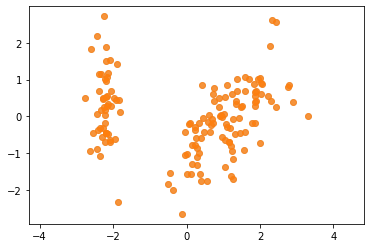

In [12]:
#To understand the effect of this dimensionality reduction, we can perform the inverse 
#transform of this reduced data and plot it along with the original data:
X_pca=get_pca.transform(pca1)
X_new = get_pca.inverse_transform(X_pca)
plt.scatter(pca1[:, 0], pca1[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [13]:
pca = PCA(n_components=4)
pca.fit(pc_data)
X_pca = pca.transform(pc_data)
print("original shape:   ", X_pca.shape)
print("transformed shape:", X_pca.shape)

original shape:    (150, 4)
transformed shape: (150, 4)


## Computing the correlation coefficient btw each original feature and the new features generated by the PCA

In [14]:
new_data = sc_data.join(pc_data,on=None)
new_data

,sepal length,sepal width,petal length,petal width,pc1,pc2,pc3,pc4
0,-0.900681,1.032057,-1.341272,-1.312977,-2.264542,0.505704,-0.121943,-0.023073
1,-1.143017,-0.124958,-1.341272,-1.312977,-2.086426,-0.655405,-0.227251,-0.103208
2,-1.385353,0.337848,-1.398138,-1.312977,-2.367950,-0.318477,0.051480,-0.027825
3,-1.506521,0.106445,-1.284407,-1.312977,-2.304197,-0.575368,0.098860,0.066311
4,-1.021849,1.263460,-1.341272,-1.312977,-2.388777,0.674767,0.021428,0.037397
...,...,...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,1.870522,0.382822,0.254532,-0.388890
146,0.553333,-1.281972,0.705893,0.922064,1.558492,-0.905314,-0.025382,-0.221322
147,0.795669,-0.124958,0.819624,1.053537,1.520845,0.266795,0.179277,-0.118903
148,0.432165,0.800654,0.933356,1.447956,1.376391,1.016362,0.931405,-0.024146


In [15]:
new_data_corr = new_data.corr()
new_data_corr

#new_data_corr[comb[0][0]][comb[0][1]]

,sepal length,sepal width,petal length,petal width,pc1,pc2,pc3,pc4
sepal length,1.000000,-0.109369,0.871754,0.817954,8.912245e-01,3.573521e-01,-2.767740e-01,-3.761047e-02
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-4.493130e-01,8.883515e-01,9.290825e-02,1.782003e-02
petal length,0.871754,-0.420516,1.000000,0.962757,9.916844e-01,2.024682e-02,5.408378e-02,1.150088e-01
petal width,0.817954,-0.356544,0.962757,1.000000,9.649958e-01,6.278622e-02,2.432950e-01,-7.515708e-02
pc1,0.891224,-0.449313,0.991684,0.964996,1.000000e+00,-2.556855e-16,2.712332e-17,-3.626418e-17
pc2,0.357352,0.888351,0.020247,0.062786,-2.556855e-16,1.000000e+00,-2.464035e-17,2.215880e-17
pc3,-0.276774,0.092908,0.054084,0.243295,2.712332e-17,-2.464035e-17,1.000000e+00,6.212065e-17
pc4,-0.037610,0.017820,0.115009,-0.075157,-3.626418e-17,2.215880e-17,6.212065e-17,1.000000e+00


In [16]:
comb = [[(x, y) for x in  sc_data.columns] for y in pc_data.columns]
for ele in [item for sublist in comb for item in sublist]:
    print(f'The correlation of {ele[0]} and {ele[1]} is {new_data_corr[ele[0]][ele[1]]}')

The correlation of sepal length and pc1 is 0.891224478893358
The correlation of sepal width and pc1 is -0.4493129756580253
The correlation of petal length and pc1 is 0.9916844215984978
The correlation of petal width and pc1 is 0.9649957874713759
The correlation of sepal length and pc2 is 0.3573521137251364
The correlation of sepal width and pc2 is 0.888351481188338
The correlation of petal length and pc2 is 0.020246820556883635
The correlation of petal width and pc2 is 0.06278622182633803
The correlation of sepal length and pc3 is -0.27677400028930826
The correlation of sepal width and pc3 is 0.09290824677884751
The correlation of petal length and pc3 is 0.0540837793256454
The correlation of petal width and pc3 is 0.24329495178339708
The correlation of sepal length and pc4 is -0.037610474622025755
The correlation of sepal width and pc4 is 0.017820029637960432
The correlation of petal length and pc4 is 0.11500877805648393
The correlation of petal width and pc4 is -0.07515708182192704


## What i can observe by comparing the results in Question1, sections 4 and 5?

The cofficient of each PC in the direction of each feature has the same sign as the correlation between this   principal component and the original feature.Consequently,it has positive coefficients in the direction of feature 1-(sepal length) and feature 3-(petal length) and feature 4-(petal width).Conversely,It has a negative coefficient in the direction of feature 2-(sepal width).

## Defining any property?

Given a dataset,the PCAs are uncorrelated with each other.For instance, PCA1 and PCA2 are not correlated.The scatter plot below clarifies the property clearly.

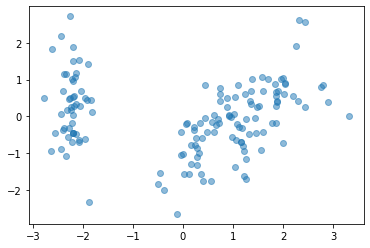

In [17]:

plt.scatter(x=pc_data["pc1"],y=pc_data["pc2"],   alpha=0.5)
plt.show()

## Attempt at the property proof:


To Proof: That the PCAs are uncorrelated with each other

s = $U^{T}x$; where s is principal component,U is the vector; we have
$E({ss^T})$ = $E({U^T xx^TU})$ = $U^T E({xx^T})U$ = $U^T(UDU^T)U$ = $(U^TU)D(U^TU)$ =$D$; because of the orthogonality of U. Thus, the covariance matrix is diagonal,
which shows that the principal components are uncorrelated.
Moreover, we see that the variances of the principal components are equal
to the $λ_{i}$

## Question 3

 Creating database for question 3 
 database reply if you need anti-retroviral when you show symptoms of HIV.
 The database has 4 binary features stated as follows below-
 the features are classified into two (need anti-retroviral(1) or not(0))
 features are 1-:have rashes (1:yes, 0:no)  2-: have  dry cough (1:yes, 0:no)
3:-have sore throat (1:yes, 0:no) 4- body temperature larger 39 (1:yes, 0:no

In [18]:

features =np.array([[1,0,1,1],[1,0,1,0],[1,1,0,0],[1,1,1,0],[1,1,0,0],[0,0,0,1],[0,0,1,0],[0,1,1,1],[0,1,1,0],[0,0,0,1],[1,0,1,0], [1,1,1,0],
            [1,1,1,0],[1,0,0,1],[1,1,0,1],[0,0,1,0], [0,1,1,1],[1,0,0,0],[0,0,1,0], [0,1,1,1]])              
            
classes=np.array([[1],[0],[0],[1],[0],[1],[0],[1],[0],[1],[0],[1],[1],[1],[1],[0],[1],[0],[0],[1]])

In [19]:
class Node: #node class
    def __init__(self,level,number,leaf,featurenum,par_feat_value,value,parent_num,ent_info_gain_gini): 
        self.level=level
        self.number=number 
        self.leaf=leaf 
        self.featurenum=featurenum 
        self.par_feat_value=par_feat_value 
        self.value=value  
        self.parent_num=parent_num 
        self.ent_info_gain_gini=ent_info_gain_gini 
        
    def print_node(self):
        print("                                                              ")
        print("Node Level:",self.level)
        print("Node number:",self.number)
        print("If node is leaf:",self.leaf)
        print("feature checked by node is feature number:",self.featurenum)
        print("parent value to reach this Node:",self.par_feat_value)
        print("The value of the node if it is leaf:",self.value)
        print("Parent node number:",self.parent_num)
        print("Entropy information gain of this node:",self.ent_info_gain_gini)
        print("                                                                ")
      
    

In [20]:
def create_tree(features,classes):#function to create tre based on entropy gain info
    featureNo=len(features[0]) #calculate number of features
    dataset= np.append(features, classes, axis = 1) #add features and classes to one dataset 
    df = pd.DataFrame(dataset) #convert the dataset to dataframe
    tree=[] 
    tree_level=featureNo+1 
    for i in range(0,tree_level): 
        if i==0: 
            a1=create_node(df,featureNo)
            a1.level=0
            a1.number=1
            a1.parent_feature_val=None
            a1.parent_num=None
            a1.print_node()
            tree.append(a1)  
        else:  
            for obj in tree:
                node_num=1
                if (obj.leaf == 0) & (obj.level==(i-1)):                    
                    parent_number=obj.number
                
                    df2 = df[df[obj.featurenum] == 0]
                    a2=create_node(df2,featureNo)
                    a2.level=i
                    a2.number=node_num
                    a2.parent_feature_val=0
                    a2.parent_num=parent_number
                    if a2.leaf ==1:
                        a2.featurenum=None
                    print("Created node")
                    a2.print_node()
                    tree.append(a2)
                    node_num+=1
                    if a2.leaf == 1: 
                        df = df[df[obj.featurenum] == 1]
                    df3 = df[df[obj.featurenum] == 1]  
                    a3=create_node(df3,featureNo)
                    a3.level=i
                    a3.number=node_num
                    a3.parent_feature_val=1
                    a3.parent_num=parent_number
                    if a3.leaf ==1:
                        a3.featurenum=None
                    print("Created node")
                    a3.print_node()
                    tree.append(a3)
                    node_num+=1
                    if a3.leaf == 1:
                        df = df[df[obj.featurenum] == 0]  
    return tree

In [21]:
def create_gini_tree(features,classes):  
    featureNo=len(features[0])
    dataset= np.append(features, classes, axis = 1)  
    d_frame = pd.DataFrame(dataset) 
    tree=[] 
    tree_level=featureNo+1 
    for i in range(0,tree_level): 
        if i==0:
            a1=create_gini_node(d_frame,featureNo)
            a1.level=0
            a1.number=1
            a1.parent_feature_val=None
            a1.parent_num=None
            a1.print_node()
            tree.append(a1)    
        else:  
            for obj in tree:
                node_num=1
                if (obj.leaf == 0) & (obj.level==(i-1)):                    
                    parent_number=obj.number
                    
                    d_frame2 = d_frame[d_frame[obj.featurenum] == 0]
                    a2=create_gini_node(d_frame2,featureNo)
                    a2.level=i
                    a2.number=node_num
                    a2.parent_feature_val=0
                    a2.parent_num=parent_number
                    if a2.leaf ==1:
                        a2.featurenum=None
                    print("Created node")
                    a2.print_node()
                    tree.append(a2) 
                    node_num+=1
                    if a2.leaf == 1: 
                        d_frame = d_frame[d_frame[obj.featurenum] == 1]
                    d_frame3 = d_frame[d_frame[obj.featurenum] == 1]  
                    a3=create_gini_node(d_frame3,featureNo)
                    a3.level=i
                    a3.number=node_num
                    a3.parent_feature_val=1
                    a3.parent_num=parent_number
                    if a3.leaf ==1:
                        a3.featurenum=None
                    print("Created node")
                    a3.print_node()
                    tree.append(a3)
                    node_num+=1
                    if a3.leaf == 1:
                        d_frame = d_frame[d_frame[obj.featurenum] == 0]
    return tree

In [22]:
def create_node(d_frame,featureNo):
  
    threshold=.00001 
    c0_itms=0 
    c1_itms=0 
    for ind in d_frame.index:
        x=d_frame.at[ind,featureNo] 
        if x == 0: 
            c0_itms+=1
        else:
            c1_itms+=1
    
    splitting_values=np.zeros((featureNo*2,2))
    for col in d_frame.columns : 
        for ind in d_frame.index :
            if col != featureNo:
                x=d_frame.at[ind,col]
                y=d_frame.at[ind,featureNo] 
                if ((x==0) and  (y==0)):
                    splitting_values[2*col,0]+=1
                elif ((x==1)  and  (y==0)):
                    splitting_values[2*col+1,0]+=1;  
                elif ((x==0) and  (y==1)):
                    splitting_values[2*col,1]+=1
                else:
                    splitting_values[2*col+1,1]+=1
       
    features_entropy_gain_ratio=np.zeros((featureNo,1))
    root_entropy = -1*(c0_itms/(c0_itms+c1_itms))* np.log2(c0_itms/(c0_itms+c1_itms)) - (c1_itms/(c0_itms+c1_itms))*np.log2(c1_itms/(c0_itms+c1_itms))
    for col in d_frame.columns: 
        if col != featureNo:
            tmp1=(splitting_values[2*col,0]/(splitting_values[2*col,0]+splitting_values[2*col,1]));
            tmp2=(splitting_values[2*col,1]/(splitting_values[2*col,0]+splitting_values[2*col,1]));  
            c1_entropy= -1*tmp1*np.log2(tmp1+threshold) - tmp2*np.log2(tmp2+threshold)
            tmp3=(splitting_values[2*col+1,0]/(splitting_values[2*col+1,0]+splitting_values[2*col+1,1]));
            tmp4=(splitting_values[2*col+1,1]/(splitting_values[2*col+1,0]+splitting_values[2*col+1,1]));
            c2_entropy= -1*tmp3*np.log2(tmp3+threshold) - tmp4*np.log2(tmp4+threshold)
            total_num_samples=  splitting_values[2*col,0]+splitting_values[2*col,1]+splitting_values[2*col+1,0]+splitting_values[2*col+1,1]
            feature_weighted_entropy= ((splitting_values[2*col,0]+splitting_values[2*col,1])/total_num_samples)*c1_entropy+ ((splitting_values[2*col+1,0]+splitting_values[2*col+1,1])/total_num_samples)*c2_entropy
            split_gain=root_entropy-feature_weighted_entropy
            tmp5=((splitting_values[2*col,0]+splitting_values[2*col,1])/total_num_samples)
            tmp6=((splitting_values[2*col+1,0]+splitting_values[2*col+1,1])/total_num_samples)  
            split_info=-1*tmp5*np.log2(tmp5+threshold)-tmp6*np.log2(tmp6+threshold)
            features_entropy_gain_ratio[col]=split_gain/split_info
          
            if (math.isnan(features_entropy_gain_ratio[col])):
                features_entropy_gain_ratio[col]=0
    
    tmp1 = features_entropy_gain_ratio[0]
    feature_num_split=0
    for col in d_frame.columns:
        if (col != featureNo) & (col != 0):
            tmp2 = features_entropy_gain_ratio[col]
            if (tmp2>tmp1): 
                feature_num_split=col
            else: 
                tmp1=tmp2  
        
    tmp1=d_frame.at[d_frame.first_valid_index(),featureNo] 
    leaf=1
    for ind in d_frame.index :
        if ind != 0:
            tmp2= d_frame.at[ind,featureNo]
            if (tmp2 != tmp1):
                leaf=0
            else :
                leaf_node_value=tmp2
    if leaf == 0:
        leaf_node_value=None
    if leaf == 1:
        leaf_node_value=tmp2
    eig=features_entropy_gain_ratio[feature_num_split]  
    
    n=Node(0,0,leaf,feature_num_split,0,leaf_node_value,0,eig)
    return n

In [23]:
def create_gini_node(d_frame,featureNo):
    c0_items=0 
    c1_items=0
    for ind in d_frame.index: 
        x=d_frame.at[ind,featureNo] 
        if x == 0: 
            c0_items+=1
        else:
            c1_items+=1
    splitting_values=np.zeros((featureNo*2,2))
    for col in d_frame.columns : 
        for ind in d_frame.index :
            if col != featureNo:
                x=d_frame.at[ind,col] 
                y=d_frame.at[ind,featureNo]
                if ((x==0) and  (y==0)):
                    splitting_values[2*col,0]+=1
                elif ((x==1)  and  (y==0)):
                    splitting_values[2*col+1,0]+=1;  
                elif ((x==0) and  (y==1)):
                    splitting_values[2*col,1]+=1
                else:
                    splitting_values[2*col+1,1]+=1
                
    root_gin= 1- (c0_items/(c0_items+c1_items))**2 - (c1_items/(c0_items+c1_items))**2
    features_gin=np.zeros((featureNo,1))
    
    for col in d_frame.columns :  
         if col != featureNo:
                c1_gin= 1-(splitting_values[2*col,0]/(splitting_values[2*col,0]+splitting_values[2*col,1]))**2 - (splitting_values[2*col,1]/(splitting_values[2*col,0]+splitting_values[2*col,1]))**2
                c2_gin= 1-(splitting_values[2*col+1,0]/(splitting_values[2*col+1,0]+splitting_values[2*col+1,1]))**2 - (splitting_values[2*col+1,1]/(splitting_values[2*col+1,0]+splitting_values[2*col+1,1]))**2
                total_num_samples=  splitting_values[2*col,0]+splitting_values[2*col,1]+splitting_values[2*col+1,0]+splitting_values[2*col+1,1]
                features_gin[col]= ((splitting_values[2*col,0]+splitting_values[2*col,1])/total_num_samples)*c1_gin+ ((splitting_values[2*col+1,0]+splitting_values[2*col+1,1])/total_num_samples)*c2_gin

                if (math.isnan(features_gin[col])):
                    features_gin[col]=.5
    
                
                tmp1 = features_gin[0]
                feature_num_split=0
                        
               
    for col in d_frame.columns:
        if (col != featureNo) & (col != 0):
            tmp2 = features_gin[col]
            if (tmp2<tmp1): 
                feature_num_split=col
            else: 
                tmp1=tmp2  
           
    tmp1=d_frame.at[d_frame.first_valid_index(),featureNo] 
    leaf=1
    for ind in d_frame.index :
        if ind != 0:
            tmp2= d_frame.at[ind,featureNo]
            if (tmp2 != tmp1):
                leaf=0
            else :
                leaf_node_value=tmp2
    if leaf == 0:
        leaf_node_value=None
    if leaf == 1:
        leaf_node_value=tmp2
    eig=features_gin[feature_num_split]  
   
    n=Node(0,0,leaf,feature_num_split,0,leaf_node_value,0,eig)
    return n

In [24]:
def tree_testcase(tree,test_samples): 
    d_frame = pd.DataFrame(test_samples)
    number_test_samples=d_frame.shape[0]  
    test_result=np.zeros((number_test_samples,1)) 
    for ind in d_frame.index : 
        tree_level=0
        for obj in tree:
            if obj.level ==0:
                if obj.leaf==1:
                    test_result[ind]=obj.value
                else:
                    split_feature=obj.featurenum 
                    feature_value=d_frame.at[ind,split_feature] 
                    parent_number=obj.number
                    tree_level +=1
            else:
                if ((obj.level == tree_level) & (obj.parent_num==parent_number) &(obj.parent_feature_val==feature_value)):
                    if obj.leaf==1:
                        test_result[ind]=obj.value
                    else:
                        split_feature=obj.featurenum 
                        feature_value=d_frame.at[ind,split_feature] 
                        parent_number=obj.number
                        tree_level +=1
    return test_result

## Toy Example test:

## Testing tree with Entropy Gain ratio :

In [25]:
test =np.array([[0,0,0,0],[1,0,1,1],[1,0,0,1],[1,1,1,0],[1,1,0,0], [0,0,1,0],[1,0,1,0],[0,1,1,1]])           
created_tree=[]

created_tree= create_tree(features,classes) #create tree
x=tree_testcase(created_tree,test) #test the tree with samples 
print(x)

                                                              
Node Level: 0
Node number: 1
If node is leaf: 0
feature checked by node is feature number: 3
parent value to reach this Node: 0
The value of the node if it is leaf: None
Parent node number: None
Entropy information gain of this node: [0.52118584]
                                                                
Created node
                                                              
Node Level: 1
Node number: 1
If node is leaf: 0
feature checked by node is feature number: 1
parent value to reach this Node: 0
The value of the node if it is leaf: None
Parent node number: 1
Entropy information gain of this node: [0.31130875]
                                                                
Created node
                                                              
Node Level: 1
Node number: 2
If node is leaf: 1
feature checked by node is feature number: None
parent value to reach this Node: 0
The value of the node if it is le

## Testing tree with Gini 

In [26]:

#test tree with gini 
#created_gini_tree=[]
created_gini_tree= create_gini_tree(features,classes) #create tree
x=tree_testcase(created_gini_tree,test) #test the tree with samples 
print(x)

                                                              
Node Level: 0
Node number: 1
If node is leaf: 0
feature checked by node is feature number: 3
parent value to reach this Node: 0
The value of the node if it is leaf: None
Parent node number: None
Entropy information gain of this node: [0.225]
                                                                
Created node
                                                              
Node Level: 1
Node number: 1
If node is leaf: 0
feature checked by node is feature number: 1
parent value to reach this Node: 0
The value of the node if it is leaf: None
Parent node number: 1
Entropy information gain of this node: [0.25]
                                                                
Created node
                                                              
Node Level: 1
Node number: 2
If node is leaf: 1
feature checked by node is feature number: None
parent value to reach this Node: 0
The value of the node if it is leaf: 1
Paren